In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input, Dropout, SimpleRNN, LSTM, Bidirectional, GRU,BatchNormalization, GlobalAveragePooling1D
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report
import tensorflow as tf
import matplotlib.pyplot as plt
import gensim.downloader as api
import pandas as pd
import numpy as np
import pickle
import ast
import keras
from keras import ops
from keras import layers
import matplotlib.pyplot as plt
import time
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

In [ ]:
df = pd.read_csv('/content/vector_Human_AI_50k.csv')

In [ ]:
df.head()

,text,generated
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1


In [ ]:
df['text'] = df['text'].apply(lambda x: ast.literal_eval(x))

In [ ]:
with open('vocabulary_50k.pkl', 'rb') as vocab_file:
    vocabulary = pickle.load(vocab_file)

embedding_matrix = np.load('embedding_matrix_50k.npy')

In [ ]:
embedding_matrix.shape

(59718, 300)

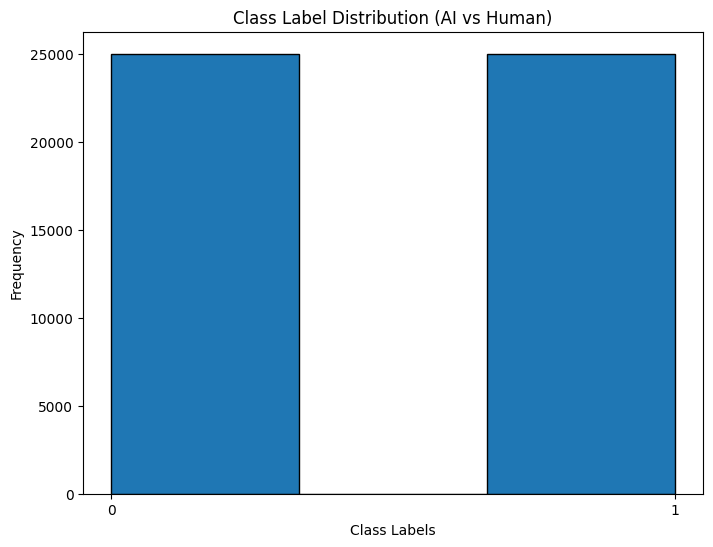

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['generated'], bins=3, edgecolor='black')
plt.title('Class Label Distribution (AI vs Human)')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.xticks([0, 1])
plt.show()

In [ ]:
X = np.array(df['text'].tolist())
y = np.array(df['generated'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

# Stacked Feed Forward Neural Network

GPU is available and memory growth is set.
Class weights: {0: 1.0, 1: 1.0}

FFN Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │      17,915,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,915,400 (68.34 MB)

 Trainable params: 17,915,400 (68.34 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.9152 - loss: 0.9099 - val_accuracy: 0.9309 - val_loss: 0.4860 - learning_rate: 0.0010
Epoch 2/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9748 - loss: 0.2921 - val_accuracy: 0.9832 - val_loss: 0.1471 - learning_rate: 0.0010
Epoch 3/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9792 - loss: 0.1361 - val_accuracy: 0.9271 - val_loss: 0.2536 - learning_rate: 0.0010
Epoch 4/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9819 - loss: 0.0980 - val_accuracy: 0.9929 - val_loss: 0.0616 - learning_rate: 0.0010
Epoch 5/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9843 - loss: 0.0822 - val_accuracy: 0.7189 - val_loss: 1.8271 - learning_rate: 0.0010
Epoch 6/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9867 - loss: 0.0757 - val_accuracy: 0.8097 - val_loss: 0.8054 - learning_rate: 0.0010
Epoch 7/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9869 - loss: 0.0

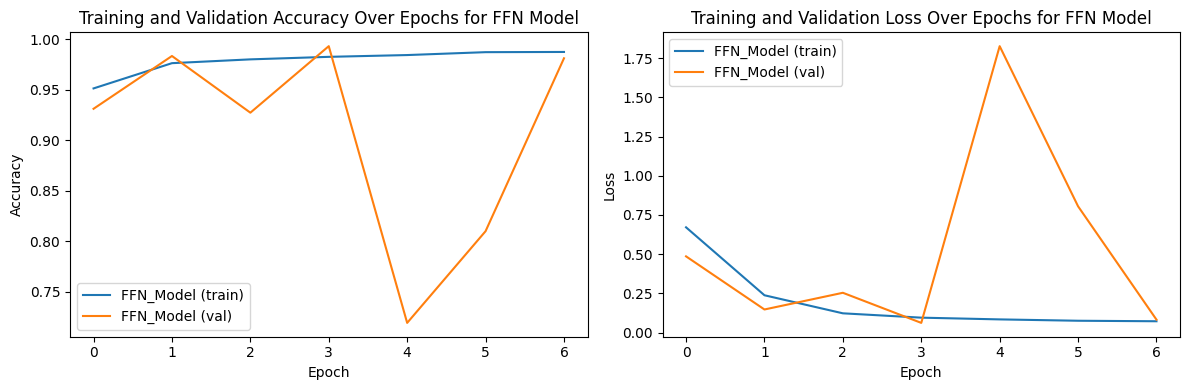

In [ ]:
# Check if GPU is available and set memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU is available and memory growth is set.")
    except RuntimeError as e:
        print(e)  # Memory growth must be set at program startup

class_counts = df['generated'].value_counts()
total_samples = len(df)
class_weights = {
    i: total_samples / (len(class_counts) * count)
    for i, count in enumerate(class_counts)
}
print("Class weights:", class_weights)

callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=0.0001
    )
]

# 1. FFN Classifier with pre-trained embeddings
def create_ffn_model(trainable=False):
    model = Sequential([
        Embedding(
            input_dim=len(vocabulary),
            output_dim=300,
            input_length=len(df['text'][0]),
            weights=[embedding_matrix],
            trainable=True
        ),
        # Improved embedding pooling
        GlobalAveragePooling1D(),

        # First hidden layer - increased size
        Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.4),

        # Second hidden layer
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),

        # Third hidden layer
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.2),

        # Fourth hidden layer
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.1),

        # Output layer
        Dense(1, activation='sigmoid')
    ])

    # Custom learning rate
    optimizer = Adam(learning_rate=0.001)

    # Changed to binary_crossentropy since output is binary
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model# Train FFN with fine-tuned embeddings
ffn_model = create_ffn_model(trainable=True)
print("\nFFN Model Summary:")
ffn_model.summary()
start_time = time.time()
ffn_history = ffn_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    #class_weight=class_weights
)
end_time = time.time()

training_time_fnn = end_time - start_time


# Evaluate FFN model
ffn_preds = ffn_model.predict(X_test)
ffn_preds_classes = np.argmax(ffn_preds, axis=1)
print("\nFFN Model Classification Report with fine-tuned embeddings:")

# Convert predicted probabilities to class labels
y_pred = (ffn_preds > 0.5).astype(int)
y_true = y_test  # Convert one-hot encoded y_test to class labels
# Calculate precision, recall, and F1 score for each class
print(classification_report(y_true, y_pred, digits=4))

print(f"Training time: {training_time_fnn} seconds")


plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(ffn_history.history['accuracy'], label=f'FFN_Model (train)')
plt.plot(ffn_history.history['val_accuracy'], label=f'FFN_Model (val)')
plt.title('Training and Validation Accuracy Over Epochs for FFN Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)

plt.plot(ffn_history.history['loss'], label=f'FFN_Model (train)')
plt.plot(ffn_history.history['val_loss'], label=f'FFN_Model (val)')
plt.title('Training and Validation Loss Over Epochs for FFN Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()